In [1]:
import os
import pandas as pd

import seaborn as sns
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
# notebook嵌入图片
%matplotlib inline
# 提高分辨率
%config InlineBackend.figure_format='retina'
from matplotlib.font_manager import FontProperties
font = FontProperties(fname="/root/miniconda3/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf")
import warnings
warnings.filterwarnings('ignore')

In [2]:
cateen=pd.read_csv('data/task1_2_1.csv',encoding='gbk')

In [3]:
# 计算人均每天刷卡频次(总刷卡次数/学生总人数)
cost_count = cateen['Time'].count()
student_count = cateen['CardNo'].value_counts(dropna=False).count()
average_cost_count = float(round(cost_count / student_count/30,2))
average_cost_count

2.46

In [4]:
# 计算人每天均消费额(总消费金额/学生总人数)
cost_sum = cateen['Money'].sum()
average_cost_money = float(round(cost_sum / student_count/30,2))
average_cost_money

9.49

In [5]:
# 选择消费次数最多的3个专业进行分析
cateen['Major'].value_counts(dropna=False)

Major
18连锁经营        12100
18机械制造        11181
18会计          10055
18宝玉石鉴定        8602
18金融管理         8494
18国际商务         8339
18模具设计         8331
18国贸实务         8201
18软件技术         8166
18商务英语         7452
18工程造价         7131
18旅游管理         6873
18皮具艺术         6792
18电子商务         6754
18审计           6564
18工业机器人        6463
18工业设计         6300
18建筑工程         6279
18电气自动化        6171
18建筑设计         6140
18计算机网络        6110
18工商企管         5763
18投资与理财        5544
18社会工作         5510
18汽车检测         5093
18市场营销         5092
18计算机应用        4546
18国际金融         4351
18艺术设计         4278
18嵌入式技术        4196
18商务日语         4154
18工业工程         3987
18酒店管理         3895
18物流管理         3666
18动漫设计         3520
18首饰设计         3411
18视觉传播         2941
18环境艺术         2853
18产品艺术         2550
18市政工程         1840
18机械制造（学徒）     1391
Name: count, dtype: int64

In [6]:
# 消费次数最多的3个专业为 连锁经营、机械制造、会计
major1 = cateen['Major'].apply(str).str.contains('18连锁经营')
major2 = cateen['Major'].apply(str).str.contains('18机械制造')
major3 = cateen['Major'].apply(str).str.contains('18会计')
major4 = cateen['Major'].apply(str).str.contains('18机械制造（学徒）')

cateen_new = cateen[(major1 | major2 | major3) ^ major4]
cateen_new['Major'].value_counts(dropna=False)

Major
18连锁经营    12100
18机械制造    11181
18会计      10055
Name: count, dtype: int64

查看消费数据分布

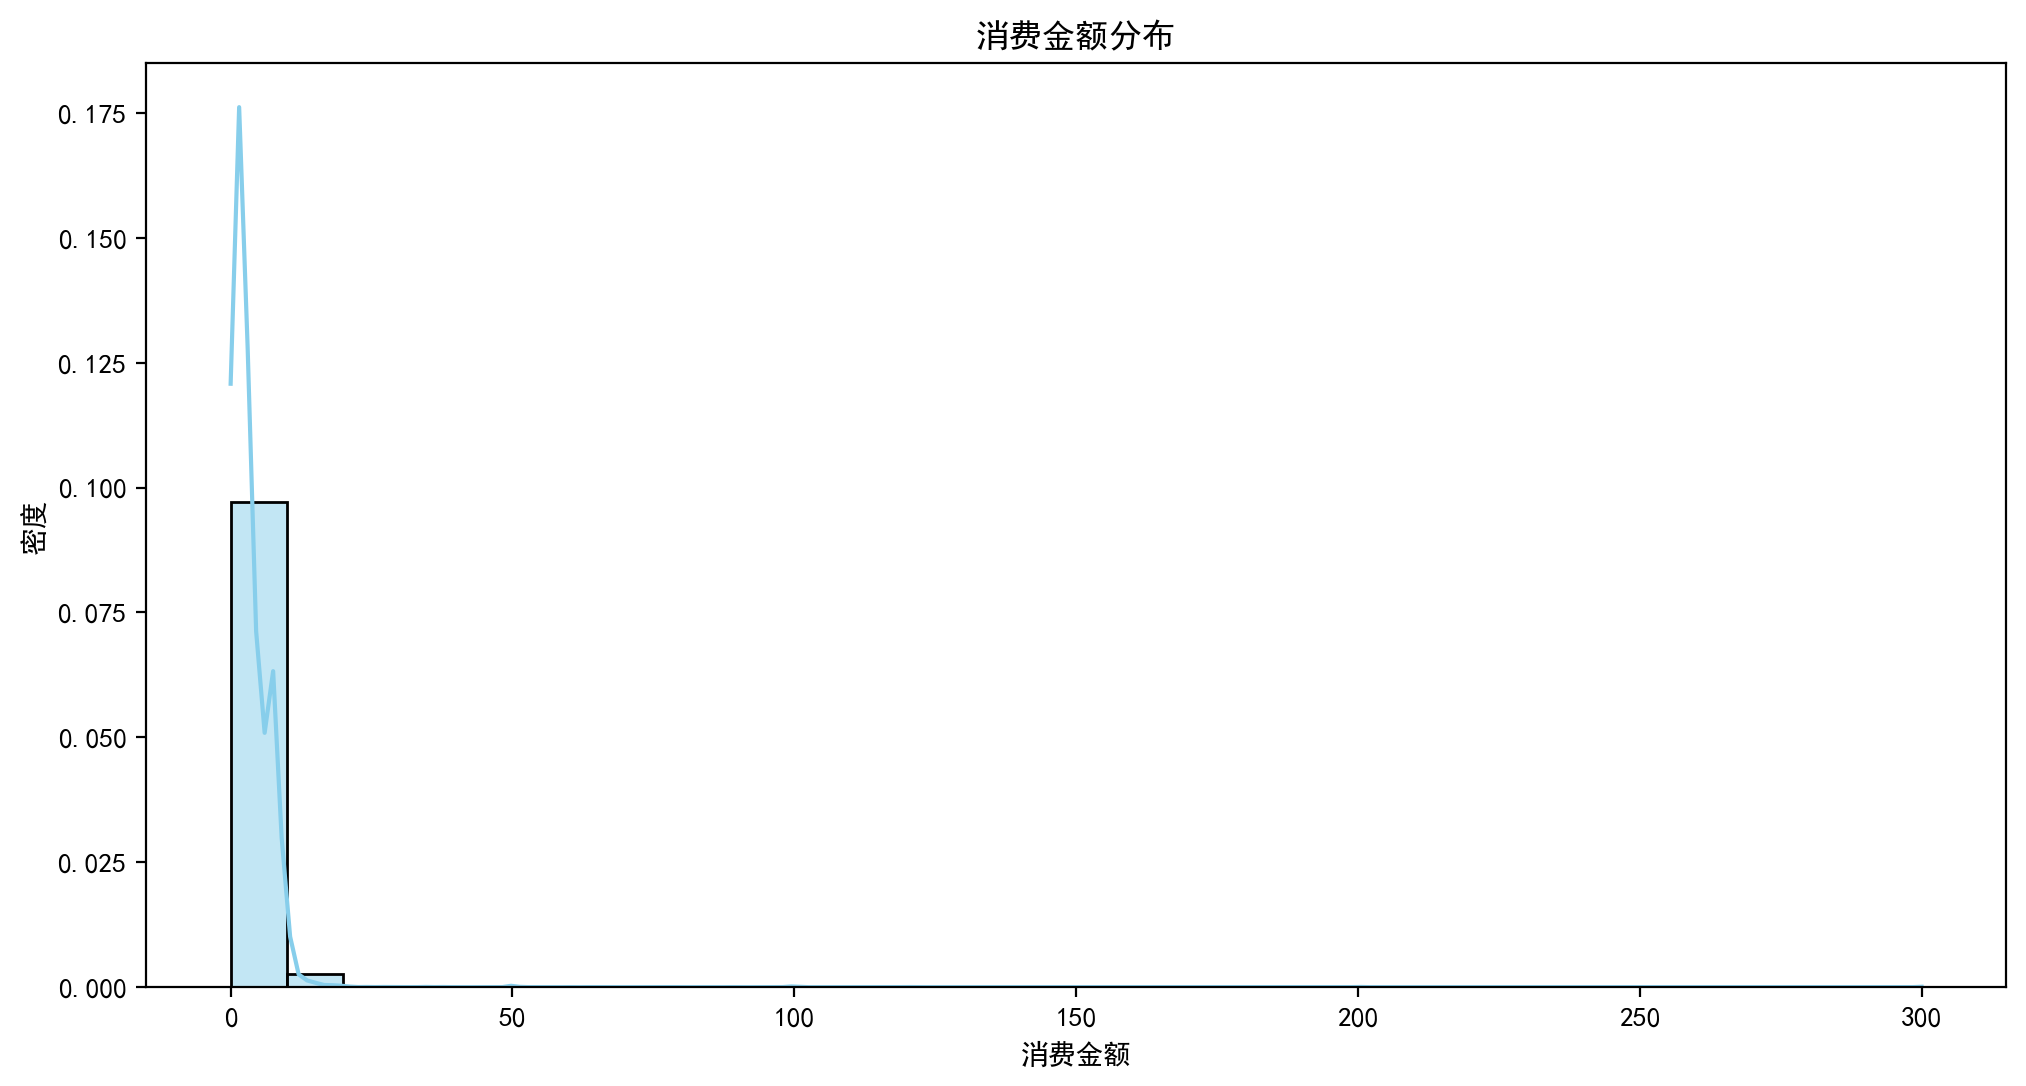

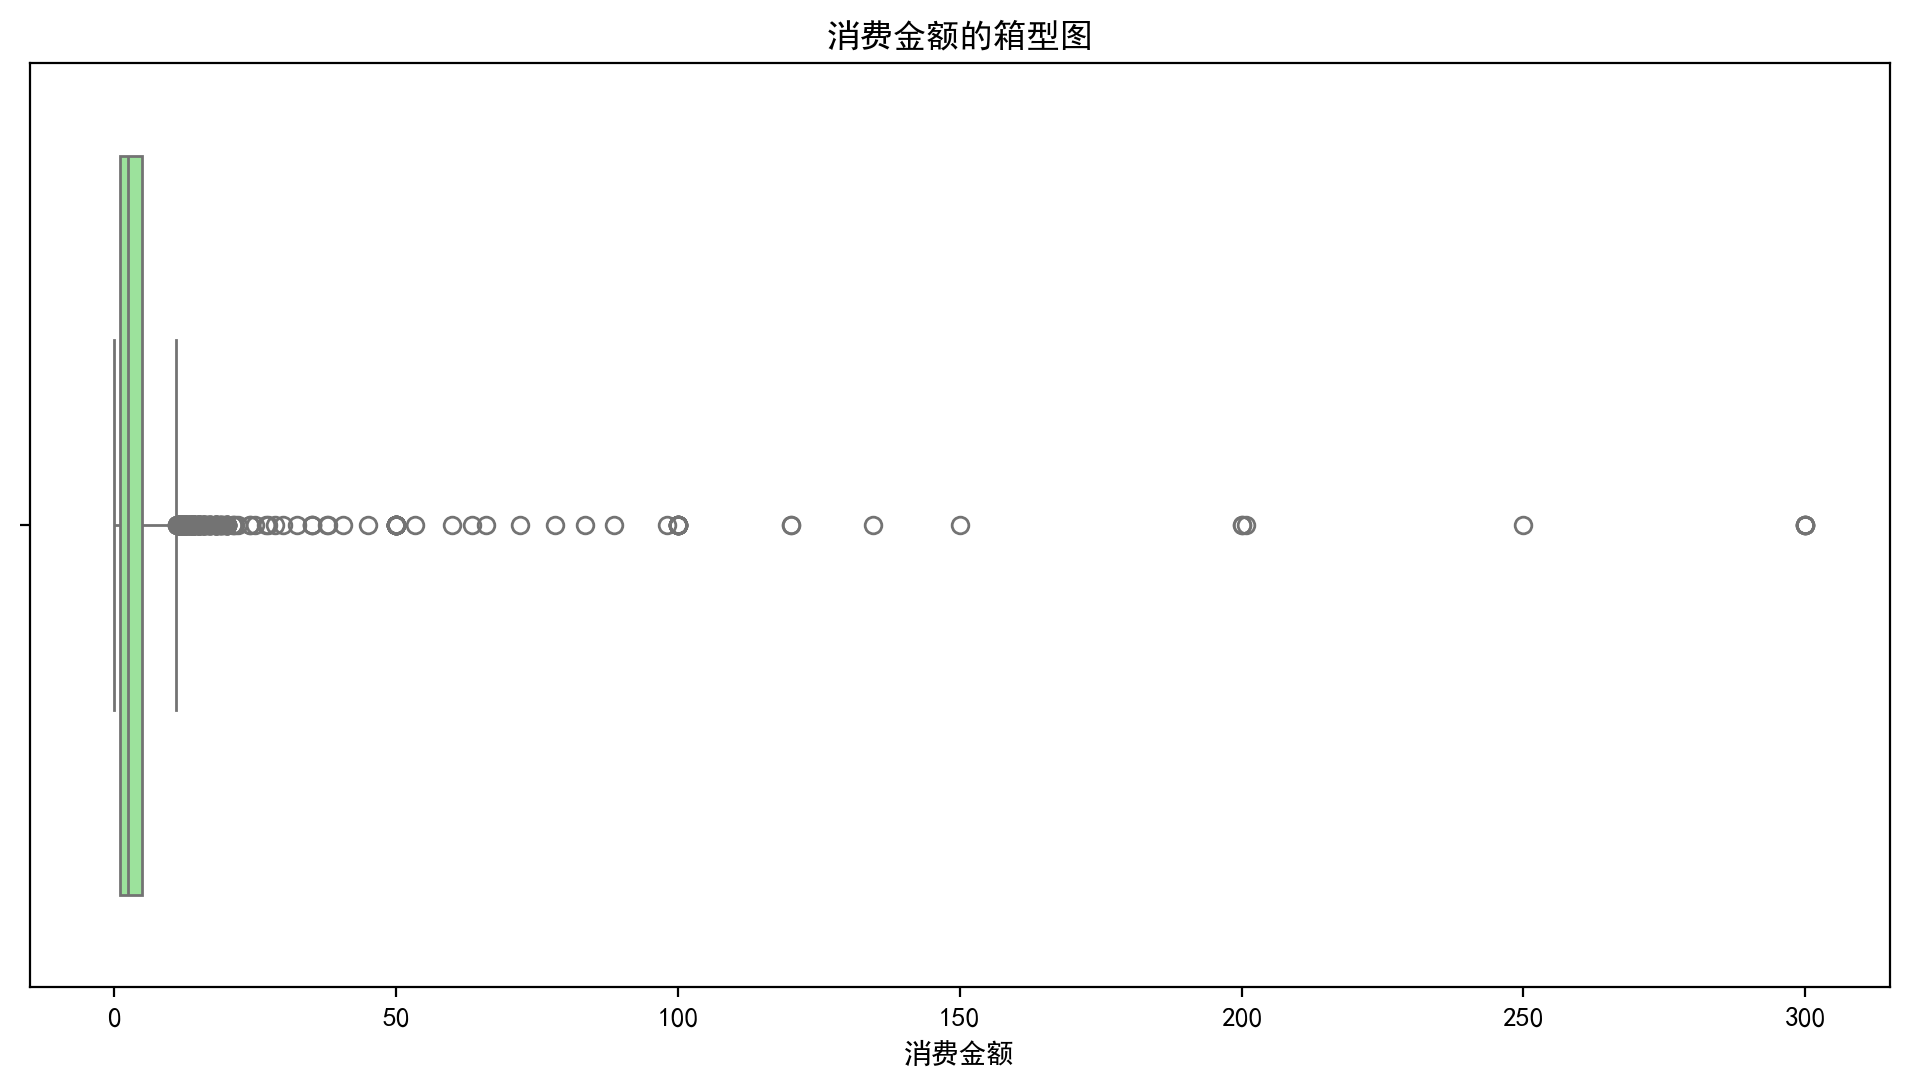

In [7]:
data = cateen_new['Money']

# 绘制消费数据的分布
plt.figure(figsize=(12, 6))

# 使用 seaborn 绘制直方图和核密度估计图
sns.histplot(data, kde=True, bins=30, color='skyblue', stat='density')

plt.title('消费金额分布')
plt.xlabel('消费金额')
plt.ylabel('密度')
plt.show()

# 2. 绘制箱型图以判断异常值
plt.figure(figsize=(12, 6))
sns.boxplot(x=data, color='lightgreen')
plt.title('消费金额的箱型图')
plt.xlabel('消费金额')
plt.show()

In [8]:
# 由图可知有部分消费为100+ 查看这些数据的消费地点为机电系等
dept=cateen_new[cateen_new['Money']>100]
dept['Dept'].unique()

array(['第四教学楼', '机电系', '飞凤轩宿管办', '第六教学楼', '财务部', '宿管办', '第五食堂'],
      dtype=object)

In [9]:
# 删除非食堂和超市消费地点的消费记录
# 使用 str.contains 判断消费地点中是否包含 "食堂" 或 "超市"
filtered_data = cateen_new[cateen_new['Dept'].str.contains('食堂|超市', na=False)]

# 2. 输出筛选后的结果
filtered_data.head()

,Index,CardNo,Sex,Major,AccessCardNo,Date,Money,FundMoney,Surplus,CardCount,Type,TermNo,OperNo,Dept,Time
3699,74,180074,男,18会计,19832682,2019/4/22,2.6,0.0,106.2,737.0,消费,114.0,8.0,第五食堂,09:37
3700,74,180074,男,18会计,19832682,2019/4/22,2.1,0.0,104.1,738.0,消费,114.0,8.0,第五食堂,09:38
3701,74,180074,男,18会计,19832682,2019/4/22,7.0,0.0,97.1,739.0,消费,175.0,247.0,第四食堂,11:52
3702,74,180074,男,18会计,19832682,2019/4/21,6.5,0.0,108.8,736.0,消费,19.0,236.0,第一食堂,16:13
3703,74,180074,男,18会计,19832682,2019/4/21,0.6,0.0,115.3,735.0,消费,100.0,236.0,第一食堂,16:12


In [10]:
filtered_data=filtered_data[filtered_data['Type']=='消费']
summary = filtered_data.groupby(['Major'])['Money'].describe()  
summary

,count,mean,std,min,25%,50%,75%,max
Major,,,,,,,,
18会计,8654.0,3.459949,2.914757,0.1,1.0,2.5,6.0,38.0
18机械制造,10641.0,3.750925,3.205211,0.2,1.5,3.0,6.0,72.0
18连锁经营,11579.0,3.175933,2.692106,0.1,1.0,2.5,4.5,30.0


In [11]:
# 三个专业消费金额描述性统计  
# filtered_data_=filtered_data[filtered_data['Type']=='消费']
summary2 = filtered_data.groupby(['Major', 'Sex'])['Money'].describe()  
summary2

count      mean       std  min  25%  50%  75%   max
Major  Sex                                                       
18会计   女     8184.0  3.394294  2.881149  0.1  0.6  2.5  5.5  38.0
       男      470.0  4.603191  3.244627  0.5  2.0  3.5  8.0  17.0
18机械制造 女      596.0  3.912919  2.781382  0.4  1.5  3.0  6.0  16.0
       男    10045.0  3.741313  3.228477  0.2  1.2  3.0  6.0  72.0
18连锁经营 女     9937.0  3.055754  2.612343  0.1  1.0  2.4  4.0  30.0
       男     1642.0  3.903228  3.032639  0.2  1.5  3.0  7.0  18.0

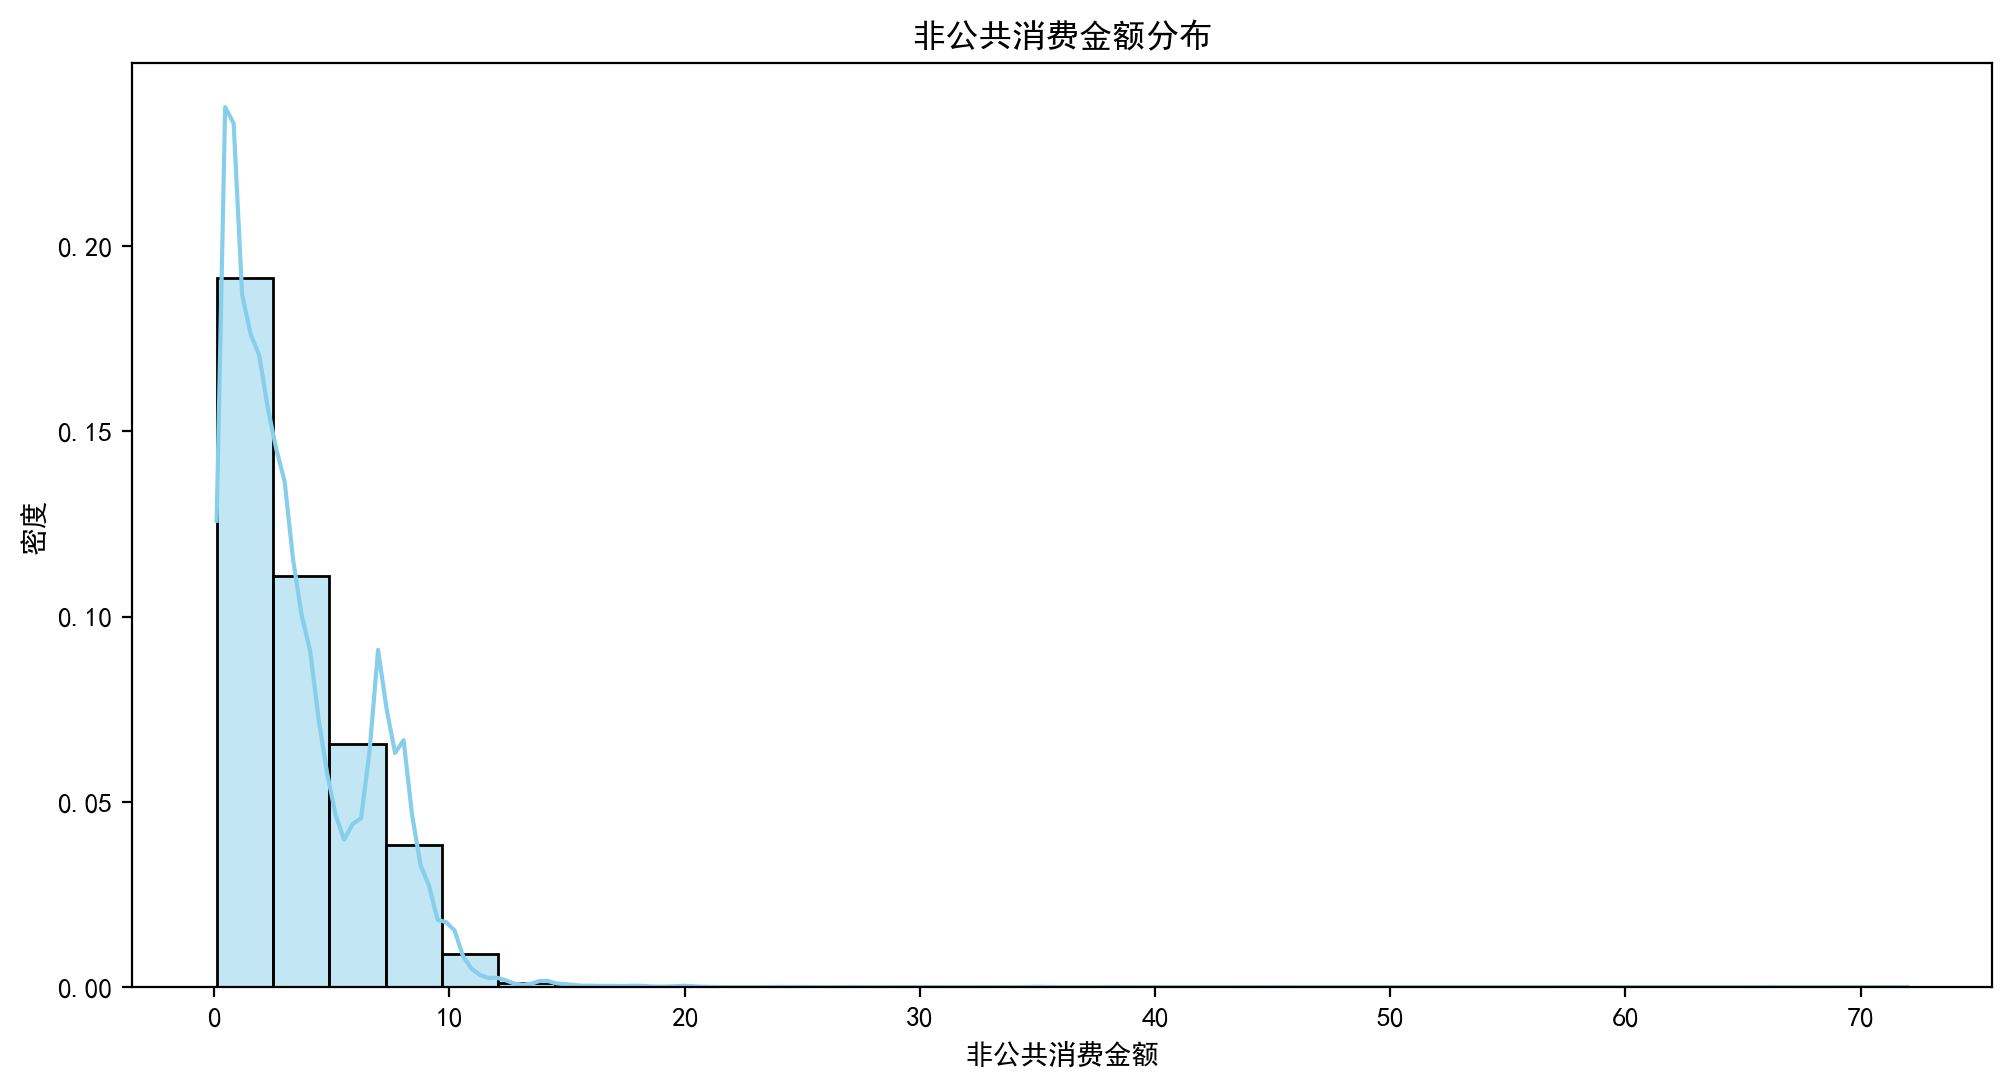

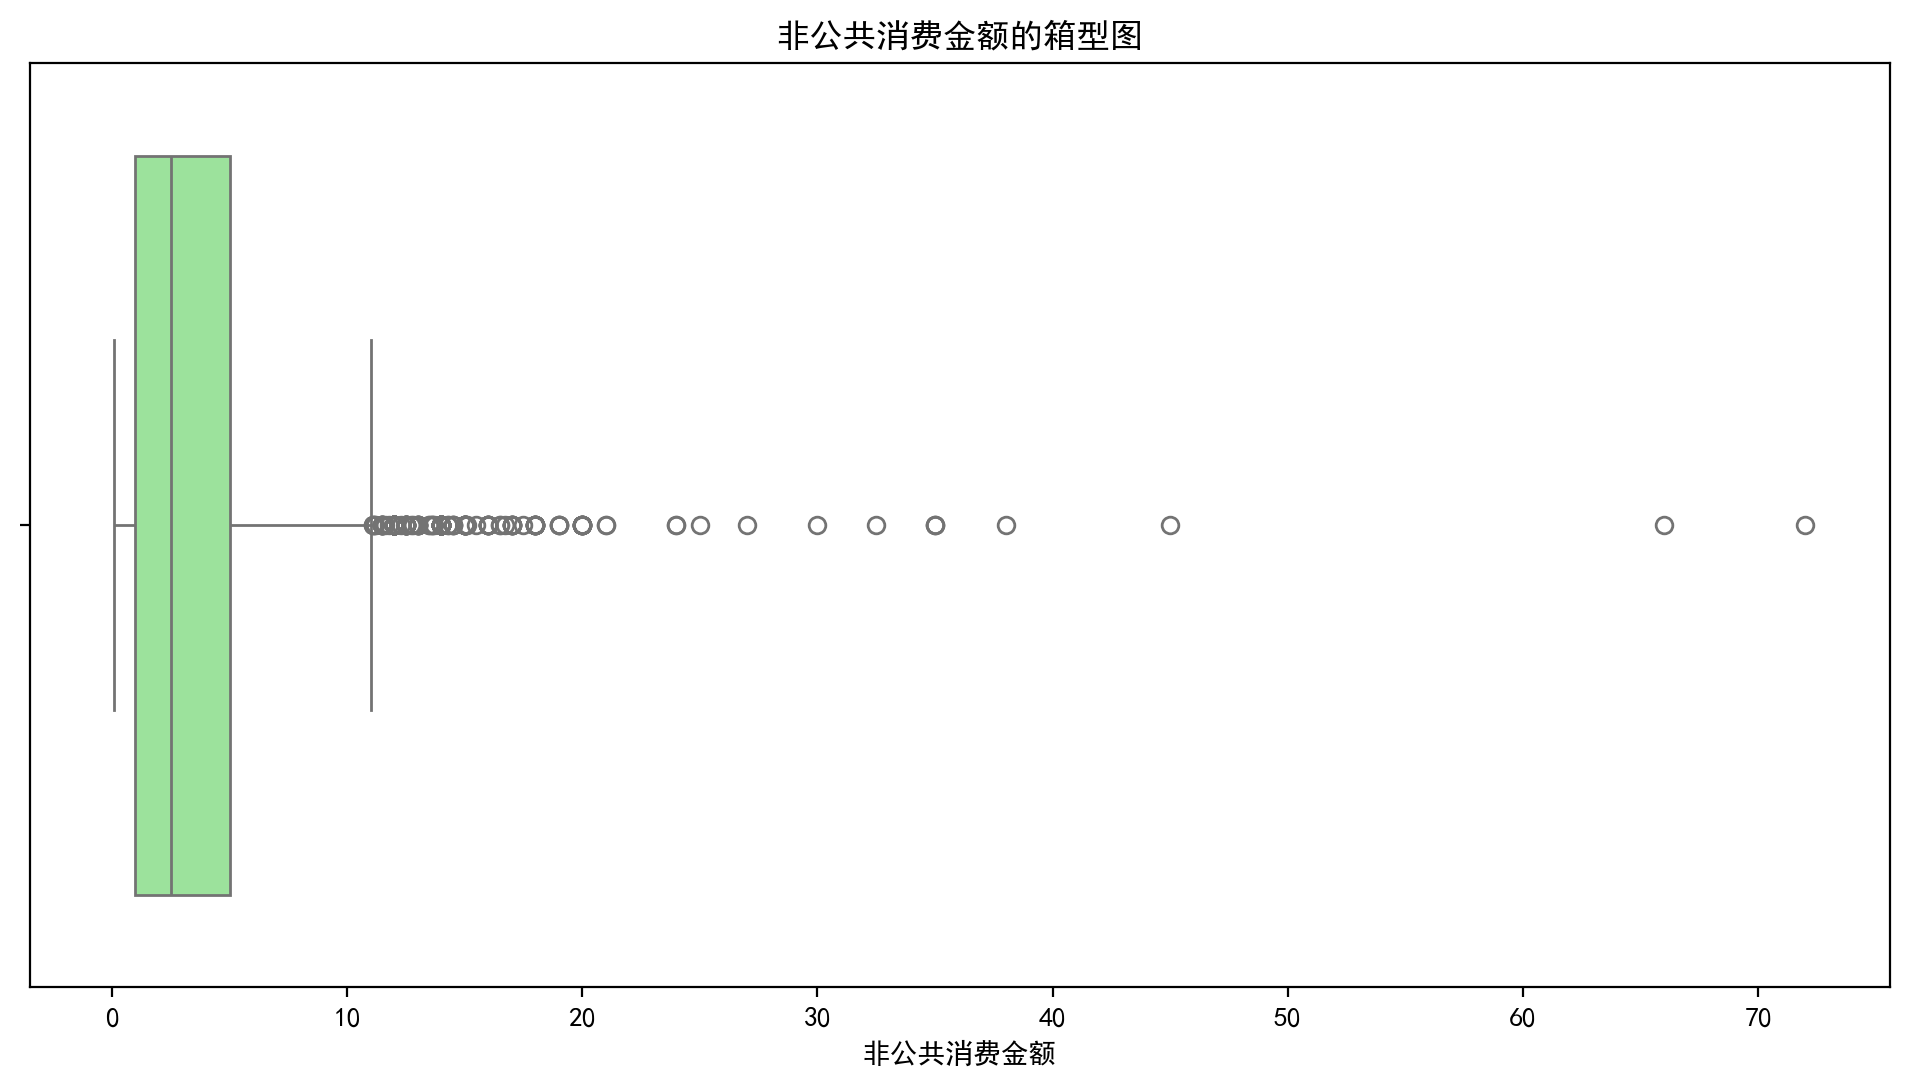

In [12]:
#再次查看消费数据分布情况
data2 = filtered_data['Money']

# 绘制消费数据的分布
plt.figure(figsize=(12, 6))

# 使用 seaborn 绘制直方图和核密度估计图
sns.histplot(data2, kde=True, bins=30, color='skyblue', stat='density')

plt.title('非公共消费金额分布')
plt.xlabel('非公共消费金额')
plt.ylabel('密度')
plt.show()

# 2. 绘制箱型图以判断异常值
plt.figure(figsize=(12, 6))
sns.boxplot(x=data2, color='lightgreen')
plt.title('非公共消费金额的箱型图')
plt.xlabel('非公共消费金额')
plt.show()

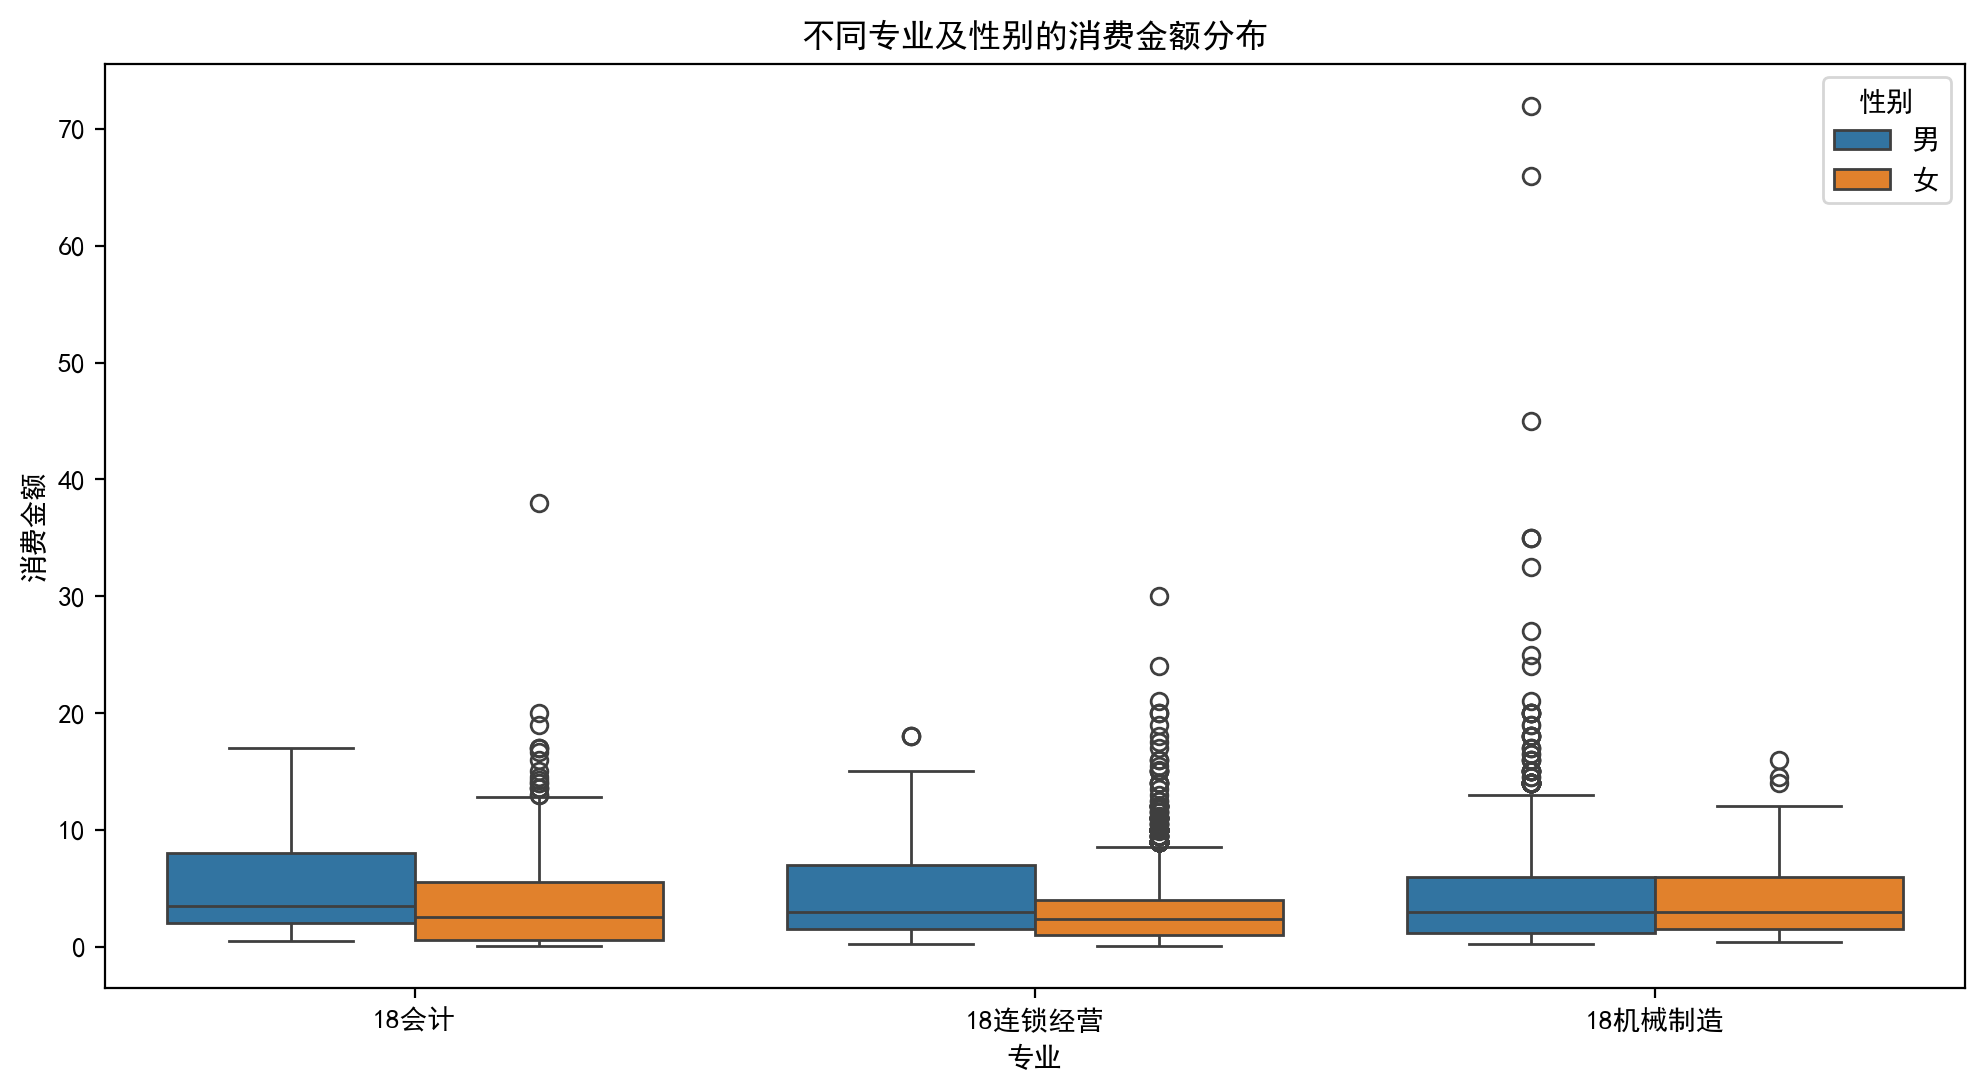

In [13]:

# 可视化  
plt.figure(figsize=(12, 6))  
sns.boxplot(x='Major', y='Money', hue='Sex', data=filtered_data)  
plt.title('不同专业及性别的消费金额分布')  
plt.xlabel('专业')  
plt.ylabel('消费金额')  
plt.legend(title='性别')  
plt.show() 

In [14]:
# 根据合适的特征进行聚类分析
